# Fire Incidents in Pittsburgh - Julius Clyburn

**Introduction**

This is an analysis of the fire incidents in neighborhoods in Pittsburgh. The data set being analized is a record of all the times there were fires reported in Pittsburgh. I will be grouping the data by different categories with scales of safety. More fires will count towards a less safe neighborhood.  

My Submetric uses this data set:
https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh/resource/8d76ac6b-5ae8-4428-82a4-043130d17b02

In [11]:
#Importing all of the function librarys.
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
#Defining and printing the first 10 rows of the data set
DataSet = pd.read_csv("FireIncidents.csv", sep = ",")

DataSet.head(10)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,9,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",1,2018-03-15T20:39:05,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,10,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",0,2017-06-03T01:31:13,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


This is a glimpse at the data set but it has too many rows to print. There are unnecessary columns as well which will be cut out of the data because they are not crucial.

In [13]:
#Specifying two elements of the data set
neighborhood_type_description.loc[:,["neighborhood", "type_description"]]

NameError: name 'neighborhood_type_description' is not defined

I will be focusing on the "neighborhood" column. I chose this one because each neighborhood's safety is what what we want to measure. I will also be looking at the "type_description" column to determine the severity of each fire. There are a total of almost 10000 reported fires that need to be organized.

In [14]:
#Establishing a data frame and counting up the occurences within that data frame
fire_type_totals = DataSet['type_description'].value_counts()

#Plotting a pie chart defining its size and domain(the first 10 rows of fire types)
top_10_fire_types.head(10).plot.pie(y='type_description',figsize=(10, 10))

NameError: name 'top_10_fire_types' is not defined

Of the different types of fires graphed above it is clear to see the most common are building fires and cookies fires, confined to a container. In my opinion, it would be pretty obvious that most fires contained could be put out far easier than a building fire. Seven of the ten categories are outdoor fires and I think an actual forest fire or anything of the sort would be very unlikely in Pittsburgh. The most severe of these fires in terms of neighborhood safety are passenger vehicle fires and building fires.

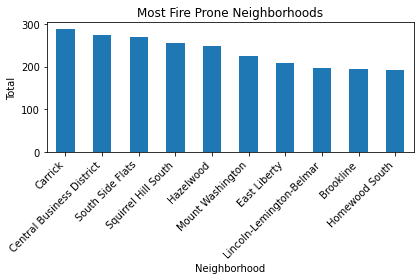

In [96]:
#Establishing a data frame and counting up the occurences within that data frame
neighborhood_totals = DataSet['neighborhood'].value_counts()

#Making the data descend rather than ascend from left to right
neighborhood_total_grouped = neighborhood_totals.sort_values(ascending = False)

#Establishing a variable for the data frame's first ten rows
top_10_fires_by_neighborhood = neighborhood_total_grouped.head(10)

#Creating the graph's display and labels
top_10_fires_by_neighborhood.plot(kind = 'bar')
plt.xlabel('Neighborhood')
plt.ylabel('Total')
plt.title('Most Fire Prone Neighborhoods')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

This shows that it within a margin of about 100 for each of the top 10 in a gradient nature. Carrick, C.B.D., and the South Side Flats are the top 3 most fire prone neighborhoods.

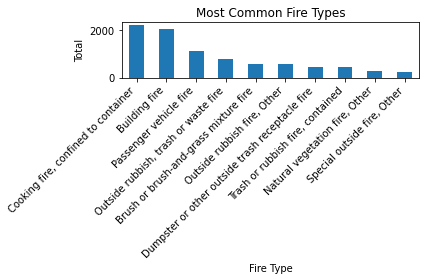

In [98]:
#Establishing a data frame and counting up the occurences within that data frame
fire_type_totals = DataSet['type_description'].value_counts()

#Making the data descend rather than ascend from left to right
fire_type_total_grouped = fire_type_totals.sort_values(ascending = False)

#Establishing a variable for the data frame's first ten rows
top_10_fire_types = fire_type_total_grouped.head(10)

#Creating the graph's display and labels
top_10_fire_types.plot(kind = 'bar')
plt.xlabel('Fire Type')
plt.ylabel('Total')
plt.title('Most Common Fire Types')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

Cooking fires and building fires are a lot more common than every other type of fire. This is interesting because it means police recieve the most fire reports about less severe fires.

**Conclusion**

A lot of the data was inconclusive without using complicated strategies of analization. My prediction of safest neighborhood was the Strip District. I have been and there a lot of buildings going under renovation. It is also rather small and during christmas time there were lights up everywhere. The Strip District is without a doubt not the least safe neighborhood. That would go to suburban Carrick for my submetric of fires.